In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import svm
from sklearn.datasets import samples_generator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import datasets

In [2]:
k = 3
iris = datasets.load_iris()
X = iris.data
y = iris.target

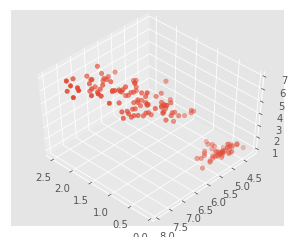

In [3]:
fig = plt.figure(1, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(X[:, 3], X[:, 0], X[:, 2])

In [11]:
class kmeans:
    def __init__(self, k=3):
        self.k = k

    def find_labels(self, X, means):
        distances = np.sqrt(np.sum((X-means[:,np.newaxis])**2,axis=2))
        return np.argmin(distances,axis=0)
    
    def find_means(self,X, labels):
        return np.array([np.mean(X[labels==i], axis=0) for i in range(self.k)])
    
    def fit(self,X, n_iters=50):
        num_training = X.shape[0]
        mask = np.random.choice(num_training, k, replace=False)
        means = X[mask]
        for _ in range(n_iters):
            labels = self.find_labels(X, means)
            means = self.find_means(X, labels)
        self.labels = self.find_labels(X, means)
        self.means = means
        

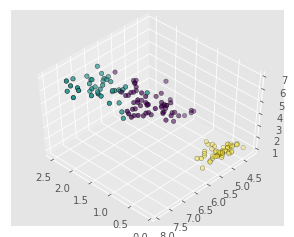

In [12]:
est = kmeans(k)
est.fit(X, n_iters=1000)
fig = plt.figure(1, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
labels = est.labels
ax.scatter(X[:, 3], X[:, 0], X[:, 2],c=labels.astype(np.float), edgecolor='k');

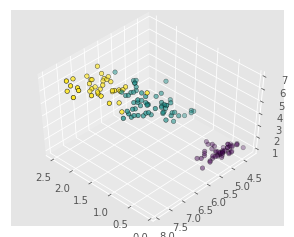

In [6]:
est = KMeans(n_clusters=3)
fig = plt.figure(1, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
est.fit(X)
labels = est.labels_
ax.scatter(X[:, 3], X[:, 0], X[:, 2],c=labels.astype(np.float), edgecolor='k');